# Pylops - Wavefield separation with cupy

In [1]:
# install conda (https://towardsdatascience.com/conda-google-colab-75f7c867a522)
%env PYTHONPATH=

env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-10-06 21:13:56--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-10-06 21:13:56--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 80.8M 1s
    50K .......... .......... .......... .......... ..........  0%

In [3]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pycosat-0.6.3              |   py36h7b6447c_0         107 KB
    setuptools-50.3.0          |   py36hb0f4dca_1         891 KB
    tk-8.6.10                  |       hbc83047_0         3.2 MB
    ld_impl_linux-64-2.33.1    |       h53a641e_7         645 KB
    ncurses-6.2                |       he6710b0_1         1.1 MB
    brotlipy-0.7.0             |py36h7b6447c_1000         348 KB
    cryptography-3.1.1         |   py36h1ba5d50_0         612 KB
    yaml-0.2.5                 |       h7b6447c_0          87 KB
    readline-8.0               |       h7b6447c_0         428 KB
    ca-certificates-2020.7.22  |                0         132 KB
    python-3.6.12              |       hcff3b4d_2   

pycosat-0.6.3        |  107 KB | ########## | 100% 
setuptools-50.3.0    |  891 KB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
ld_impl_linux-64-2.3 |  645 KB | ########## | 100% 
ncurses-6.2          |  1.1 MB | ########## | 100% 
brotlipy-0.7.0       |  348 KB | ########## | 100% 
cryptography-3.1.1   |  612 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
readline-8.0         |  428 KB | ########## | 100% 
ca-certificates-2020 |  132 KB | ########## | 100% 
python-3.6.12        | 34.0 MB | ########## | 100% 
sqlite-3.33.0        |  2.0 MB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
tqdm-4.50.0          |   55 KB | ########## | 100% 
libedit-3.1.20191231 |  121 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
pyopenssl-19

In [4]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.

Python 3.6.12 :: Anaconda, Inc.


In [5]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [6]:
!conda install -c rapidsai -c conda-forge cusignal cudatoolkit=10.1 --yes

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1
    - cusignal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py36h6957fcd_0         316 KB  conda-forge
    boost-cpp-1.74.0           |       h9359b55_0        16.4 MB  conda-forge
    bzip2-1.0.8                |       h516909a_3         398 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    conda-4.8.5                |   py36h9f0ad1d_1         3.0 MB  conda-forge
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    cudnn-7.6.5                |       cuda10.1_0       179.9 MB
    cupy-8.0.0                

In [7]:
#!pip install cupy-cuda101
!pip3 install cupy-cuda101==8.0.0rc1 --upgrade
#!pip install pylops[advanced]
!pip3 install git+https://github.com/mrava87/pylops@cupy-ext

     |████████████████████████████████| 114.9 MB 3.8 kB/s 
  Cloning https://github.com/mrava87/pylops (to revision cupy-ext) to /tmp/pip-req-build-wgyp6v0b
  Created wheel for pylops: filename=pylops-1.10.1.dev71+g326e2f9-py3-none-any.whl size=156114 sha256=b3b73ebb117b5a7ca41cffba4add6573a87dade399651fa1f3942879ea0a58b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-n72b6ve6/wheels/92/3f/33/bb1bd7335dab4f72f8e54c5c935b290d143c80c09cb50b8b28
Successfully built pylops


In [8]:
# all RAPIDS env... : https://medium.com/dropout-analytics/installing-rapids-ai-in-google-colab-87c247f2c468
# https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=CtNdk7PSafKP

In [9]:
!rm -rf /usr/local/lib/python3.6/dist-packages/cupy*

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import cupy as cp
import scipy as sp
import cusignal
import matplotlib.pyplot as plt

from google.colab import drive
from scipy.signal import convolve, filtfilt
from scipy.sparse.linalg import inv, lsqr
from scipy.sparse import rand

from pylops.utils import dottest
from pylops.utils.seismicevents import *
from pylops.utils.wavelets import *
from pylops.utils.tapers import *
from pylops import LinearOperator
from pylops.basicoperators import *
from pylops.signalprocessing import *
from pylops.waveeqprocessing.wavedecomposition import *
from pylops.optimization.sparsity import *

np.random.seed(10)

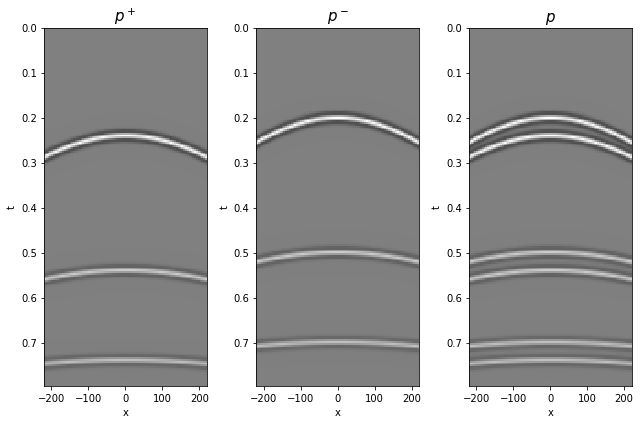

In [11]:
###### Input parameters
par = {'ox':-220,  'dx':5,    'nx':89,
       'oy':-300,  'dy':5,    'ny':121,
       'ot':0,     'dt':0.004, 'nt':200,
       'f0': 40}

t0_minus = np.array([0.2,0.5,0.7])
t0_plus = t0_minus + 0.04
vrms = np.array([1400.,1500., 2000.])
amp = np.array([1.,0.6,0.5])
vel_sep = 900.0 # velocity at separation level
rho_sep = 1000.0 # density at separation level

# Create axis
t,t2,x,y = makeaxis(par)

# Create wavelet
wav = ricker(t[:41], f0=par['f0'])[0]

# Create data
_, p_minus = hyperbolic2d(x, t, t0_minus, vrms, amp, wav)
_, p_plus = hyperbolic2d(x, t, t0_plus, vrms, amp, wav)
p = p_plus + p_minus

p_minus = cp.array(p_minus)
p_plus = cp.array(p_plus)
p = cp.array(p)

plt.figure(figsize=(9,6))
plt.subplot(131)
plt.imshow(cp.asnumpy(p_plus).T,aspect='auto',interpolation='nearest', cmap='gray',
           extent=(x.min(),x.max(),t.max(),t.min()), vmin=-1, vmax=1)
plt.title(r'$p^+$', fontsize=15)
plt.xlabel('x'),plt.ylabel('t')

plt.subplot(132)
plt.imshow(cp.asnumpy(p_minus).T,aspect='auto',interpolation='nearest', cmap='gray',
           extent=(x.min(),x.max(),t.max(),t.min()), vmin=-1, vmax=1)
plt.title(r'$p^-$', fontsize=15)
plt.xlabel('x'),plt.ylabel('t')
plt.tight_layout()

plt.subplot(133)
plt.imshow(cp.asnumpy(p).T,aspect='auto',interpolation='nearest', cmap='gray',
           extent=(x.min(),x.max(),t.max(),t.min()), vmin=-1, vmax=1)
plt.title(r'$p$', fontsize=15)
plt.xlabel('x'),plt.ylabel('t')
plt.tight_layout()

In [12]:
nfft=2**11
FFTop = FFT2D(dims=[par['nx'], par['nt']], nffts=[nfft, nfft], sampling=[par['dx'], par['dt']])
dottest(FFTop, nfft*nfft, par['nt']*par['nx'], complexflag=2, backend='cupy')

P = FFTop*p.flatten()
P = P.reshape(nfft, nfft)

## Wavefield composition

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


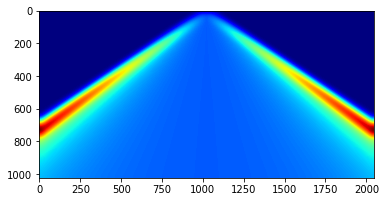

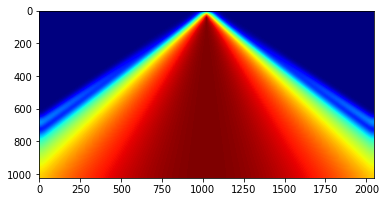

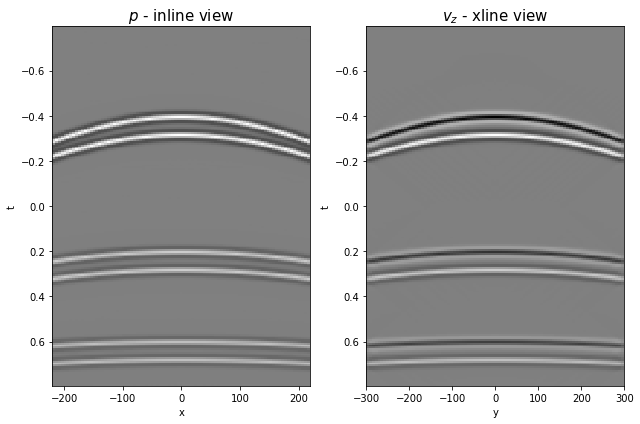

In [13]:
critical = 1.1
ntaper = 51

#obliquity factor
[Kx, F] = np.meshgrid(FFTop.f1, FFTop.f2, indexing='ij')
k=F/vel_sep
#Kz=np.sqrt(k**2-Kx**2)
Kz=np.sqrt((k**2-Kx**2).astype(np.complex))
Kz[np.isnan(Kz)] = 0

OBL=rho_sep*(np.abs(F)/Kz)
OBL[Kz==0]=0

# cut off and taper
mask = np.abs(Kx)<critical*np.abs(F)/vel_sep
OBL = OBL*mask
OBL = filtfilt(np.ones(ntaper)/float(ntaper), 1, OBL, axis=0)
OBL = filtfilt(np.ones(ntaper)/float(ntaper), 1, OBL, axis=1)

OBL1 = Kz /(rho_sep*np.abs(F))
OBL1[F==0] = 0
OBL1 = OBL1*mask
OBL1 = filtfilt(np.ones(ntaper)/float(ntaper), 1, OBL1, axis=0)
OBL1 = filtfilt(np.ones(ntaper)/float(ntaper), 1, OBL1, axis=1)

plt.figure()
plt.imshow(np.fft.fftshift(np.abs(OBL[:, :nfft//2-1]),axes=0).T, cmap='jet')   
plt.figure()
plt.imshow(np.fft.fftshift(np.abs(OBL1[:, :nfft//2-1]),axes=0).T, cmap='jet')   

OBL = cp.array(OBL)
OBL1 = cp.array(OBL1)
OBLop = Diagonal(OBL1.flatten(), dtype='complex128')

# wavefield modelling
S1op = (BlockDiag([FFTop.H, FFTop.H])*\
        Block([[Identity(nfft*nfft, dtype='complex128'), Identity(nfft*nfft, dtype='complex128')],
               [OBLop, -OBLop]])*\
        BlockDiag([FFTop, FFTop]))
dottest(S1op, 2*par['nt']*par['nx'], 2*par['nt']*par['nx'], tol=1e-4, backend='cupy')

p_sep = np.concatenate((p_plus.flatten(), p_minus.flatten()))
d = S1op * p_sep.flatten()
d = np.real(d.reshape(2*par['nx'], par['nt']))
p, vz = d[:par['nx']], d[par['nx']:]

plt.figure(figsize=(9,6))
plt.subplot(121)
plt.imshow(cp.asnumpy(p).T, aspect='auto',interpolation='nearest', cmap='gray',
           extent=(x.min(),x.max(),t.max(),t.min()), vmin=-1, vmax=1)
plt.title(r'$p$ - inline view', fontsize=15)
plt.xlabel('x'),plt.ylabel('t')
plt.subplot(122)
plt.imshow(cp.asnumpy(vz).T, aspect='auto',interpolation='nearest', cmap='gray',
           extent=(y.min(),y.max(),t.max(),t.min()))
plt.title(r'$v_z$ - xline view', fontsize=15)
plt.xlabel('y'),plt.ylabel('t')
plt.tight_layout()

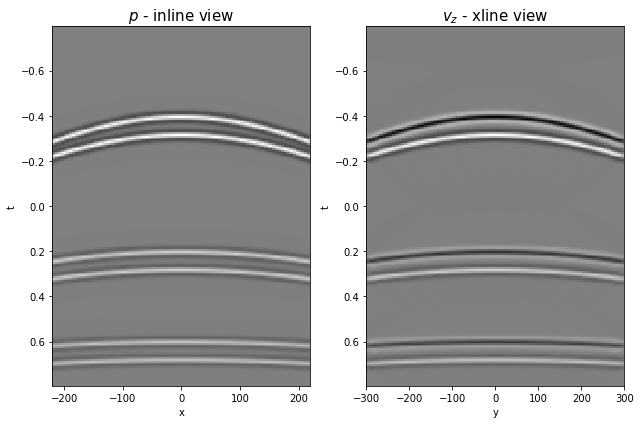

In [14]:
S1op_scaled = (BlockDiag([FFTop.H, float(1./vz.max())*FFTop.H]) *\
               Block([[Identity(nfft*nfft, dtype='complex128'), Identity(nfft*nfft, dtype='complex128')],
               [OBLop, -OBLop]])* BlockDiag([FFTop, FFTop]))

d_scaled = S1op_scaled * p_sep.flatten()
d_scaled = np.real(d_scaled.reshape(2*par['nx'], par['nt']))
p, vz_scaled = d_scaled[:par['nx']], d_scaled[par['nx']:]

plt.figure(figsize=(9,6))
plt.subplot(121)
plt.imshow(cp.asnumpy(p).T, aspect='auto',interpolation='nearest', cmap='gray',
           extent=(x.min(),x.max(),t.max(),t.min()), vmin=-1, vmax=1)
plt.title(r'$p$ - inline view', fontsize=15)
plt.xlabel('x'),plt.ylabel('t')
plt.subplot(122)
plt.imshow(cp.asnumpy(vz_scaled).T, aspect='auto',interpolation='nearest', cmap='gray',
           extent=(y.min(),y.max(),t.max(),t.min()), vmin=-1, vmax=1)
plt.title(r'$v_z$ - xline view', fontsize=15)
plt.xlabel('y'),plt.ylabel('t')
plt.tight_layout()

## Analytical separation

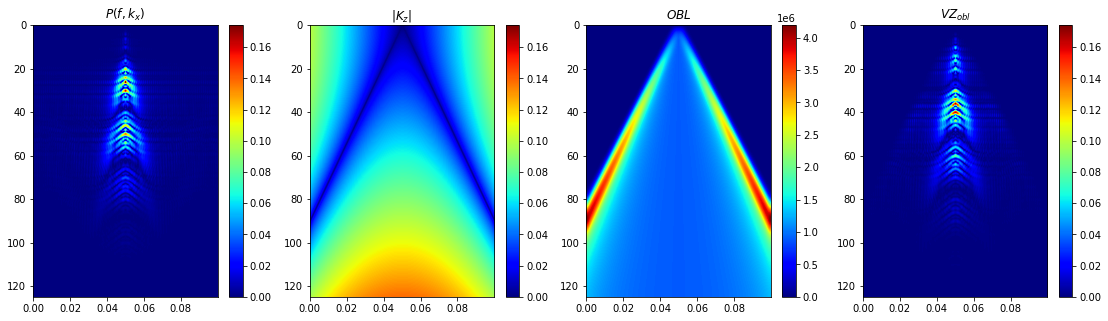

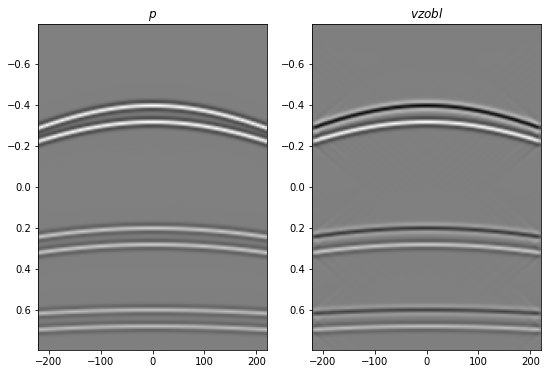

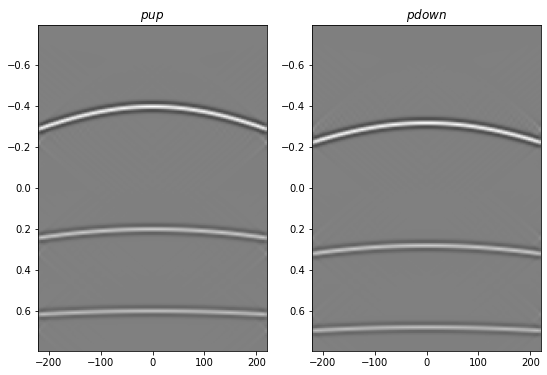

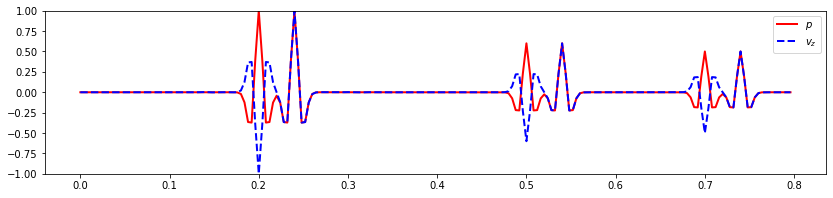

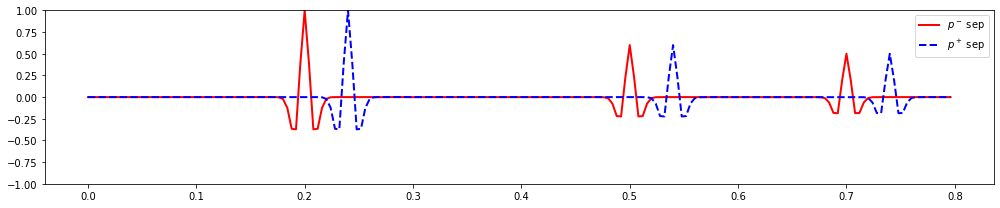

In [15]:
VZ = FFTop*vz.flatten()
VZ = VZ.reshape(nfft, nfft)

# scaled Vz
VZ_obl = OBL*VZ
vz_obl = FFTop.H*VZ_obl.flatten()
vz_obl = np.real(vz_obl.reshape(par['nx'], par['nt']))

p = FFTop.H*P.flatten()
p = np.real(p.reshape(par['nx'], par['nt']))

# separation
pup_sep=(p-vz_obl)/2;
pdown_sep=(p+vz_obl)/2;


fig, axs = plt.subplots(1, 4, figsize=(19,5))
im=axs[0].imshow(cp.asnumpy(np.fft.fftshift(np.abs(P[:, :nfft//2-1]),axes=0)).T, cmap='jet', interpolation='sinc',
             extent = (FFTop.f1[0], FFTop.f1[nfft//2-1], FFTop.f2[nfft//2-1], FFTop.f2[0]),
             vmin=0, vmax=np.abs(P).max())
axs[0].set_title(r'$P(f, k_x)$')
axs[0].axis('tight')
plt.colorbar(im, ax=axs[0])
im=axs[1].imshow(cp.asnumpy(np.fft.fftshift(np.abs(Kz[:, :nfft//2-1]),axes=0)).T, cmap='jet', interpolation='sinc',
             extent = (FFTop.f1[0], FFTop.f1[nfft//2-1], FFTop.f2[nfft//2-1], FFTop.f2[0]),
             vmin=0, vmax=np.abs(P).max())
axs[1].set_title(r'$|K_z|$')
axs[1].axis('tight')
plt.colorbar(im, ax=axs[1])
im=axs[2].imshow(cp.asnumpy(np.fft.fftshift(np.abs(OBL[:, :nfft//2-1]),axes=0)).T, cmap='jet', interpolation='sinc',
                 extent = (FFTop.f1[0], FFTop.f1[nfft//2-1], FFTop.f2[nfft//2-1], FFTop.f2[0]))
axs[2].set_title(r'$OBL$')
axs[2].axis('tight')
plt.colorbar(im, ax=axs[2])
im=axs[3].imshow(cp.asnumpy(np.fft.fftshift(np.abs(VZ_obl[:, :nfft//2-1]),axes=0)).T, cmap='jet', interpolation='sinc',
                 extent = (FFTop.f1[0], FFTop.f1[nfft//2-1], FFTop.f2[nfft//2-1], FFTop.f2[0]),
                 vmin=0, vmax=np.abs(P).max())
axs[3].set_title(r'$VZ_{obl}$')
axs[3].axis('tight')
plt.colorbar(im, ax=axs[3])

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(p).T, cmap='gray',            
              extent=(x.min(),x.max(),t.max(),t.min()), 
              vmin=-1, vmax=1)
axs[0].set_title(r'$p$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(vz_obl).T, cmap='gray',            
              extent=(x.min(),x.max(),t.max(),t.min()), 
              vmin=-1, vmax=1)
axs[1].set_title(r'$vzobl$')
axs[1].axis('tight')

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(pup_sep).T, cmap='gray',            
              extent=(x.min(),x.max(),t.max(),t.min()), 
              vmin=-1, vmax=1)
axs[0].set_title(r'$pup$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(pdown_sep).T, cmap='gray',            
              extent=(x.min(),x.max(),t.max(),t.min()), 
              vmin=-1, vmax=1)
axs[1].set_title(r'$pdown$')
axs[1].axis('tight')

plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(p)[par['nx']//2], 'r', lw=2, label=r'$p$')
plt.plot(t, cp.asnumpy(vz_obl)[par['nx']//2], '--b', lw=2, label=r'$v_z$')
plt.ylim(-1, 1)
plt.legend()
plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(pup_sep)[par['nx']//2], 'r', lw=2, label=r'$p^-$ sep')
plt.plot(t, cp.asnumpy(pdown_sep)[par['nx']//2], '--b', lw=2, label=r'$p^+$ sep')
plt.ylim(-1, 1)
plt.legend()
plt.tight_layout()

/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:109: RuntimeWarning: divide by zero encountered in true_divide
  OBL = rho * (np.abs(F) / Kz)
/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:109: RuntimeWarning: invalid value encountered in true_divide
  OBL = rho * (np.abs(F) / Kz)
/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:109: RuntimeWarning: invalid value encountered in multiply
  OBL = rho * (np.abs(F) / Kz)


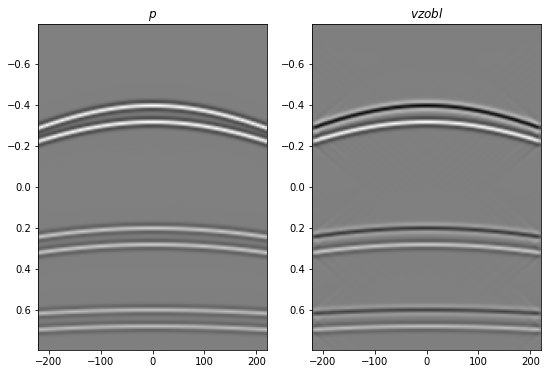

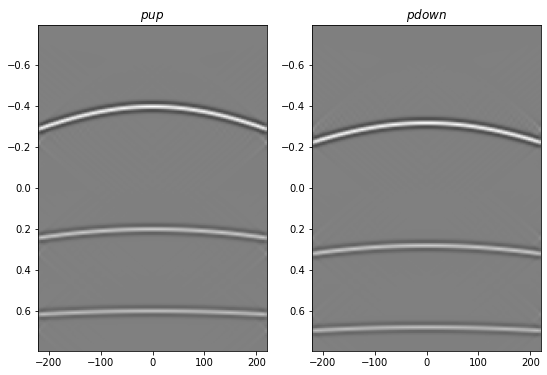

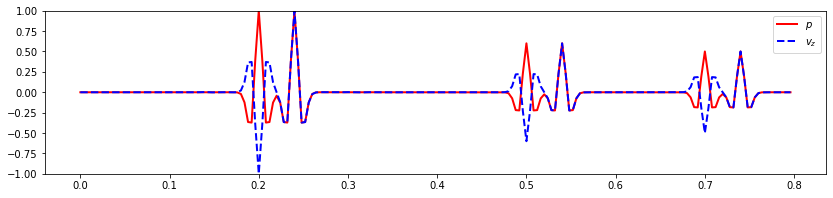

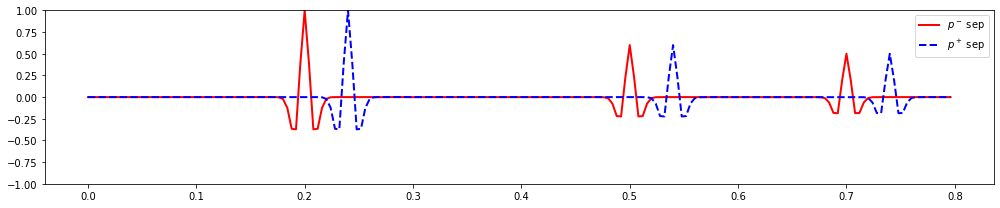

In [16]:
pup_sep, pdown_sep = \
    WavefieldDecomposition(p, vz, par['nt'], par['nx'], par['dt'], par['dx'], 
                           rho_sep, vel_sep, nffts=(nfft, nfft), kind='analytical',
                           critical=critical*100, ntaper=ntaper,
                           dtype='complex128')

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(p).T, cmap='gray',            
              extent=(x.min(),x.max(),t.max(),t.min()), 
              vmin=-1, vmax=1)
axs[0].set_title(r'$p$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(vz_obl).T, cmap='gray',            
              extent=(x.min(),x.max(),t.max(),t.min()), 
              vmin=-1, vmax=1)
axs[1].set_title(r'$vzobl$')
axs[1].axis('tight')

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(pup_sep).T, cmap='gray',            
              extent=(x.min(),x.max(),t.max(),t.min()), 
              vmin=-1, vmax=1)
axs[0].set_title(r'$pup$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(pdown_sep).T, cmap='gray',            
              extent=(x.min(),x.max(),t.max(),t.min()), 
              vmin=-1, vmax=1)
axs[1].set_title(r'$pdown$')
axs[1].axis('tight')

plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(p)[par['nx']//2], 'r', lw=2, label=r'$p$')
plt.plot(t, cp.asnumpy(vz_obl)[par['nx']//2], '--b', lw=2, label=r'$v_z$')
plt.ylim(-1, 1)
plt.legend()
plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(pup_sep)[par['nx']//2], 'r', lw=2, label=r'$p^-$ sep')
plt.plot(t, cp.asnumpy(pdown_sep)[par['nx']//2], '--b', lw=2, label=r'$p^+$ sep')
plt.ylim(-1, 1)
plt.legend()
plt.tight_layout()

## Wavefield separation by inversion

CGLS
-----------------------------------------------------------
The Operator Op has 35600 rows and 35600 cols
damp = 1.000000e-10	tol = 1.000000e-04	niter = 50
-----------------------------------------------------------------
    Itn           x[0]              r2norm
     1     -4.4e-06+1.8e-06j      3.0415e+00
     2     -2.6e-06+-2.1e-06j      1.6765e-01
     3     4.5e-06+-1.7e-06j      3.3846e-02
     4     -2.6e-06+1.1e-06j      1.0520e-02
     5     -7.9e-06+-1.1e-06j      4.1969e-03
     6     5.5e-06+-3.6e-06j      1.9872e-03
     7     -1.8e-06+-1.8e-06j      1.0446e-03
     8     -1.1e-05+-1.0e-06j      5.9252e-04
     9     1.4e-05+-2.6e-06j      3.7456e-04
    10     1.4e-05+-3.4e-06j      2.6947e-04

Iterations = 14        Total time (s) = 2.77
-----------------------------------------------------------------



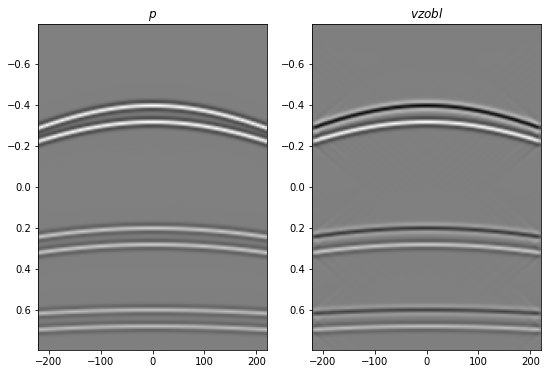

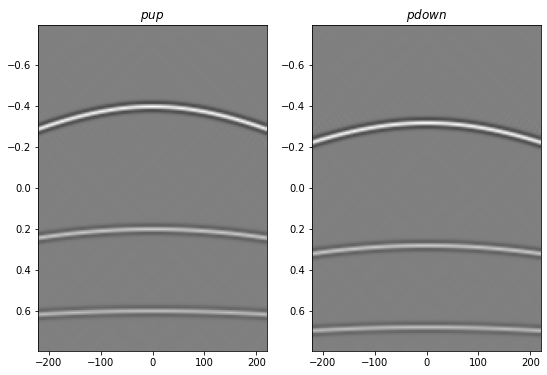

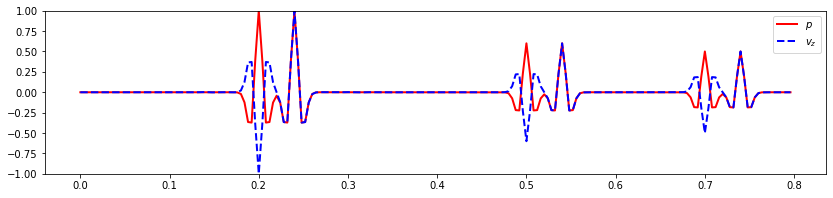

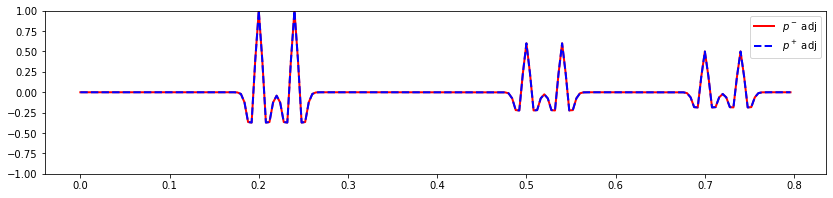

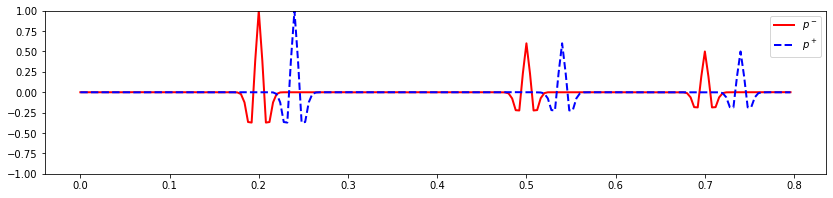

In [17]:
# adjoint and inverse
dud_adj = np.real(S1op_scaled.H * d.flatten())
dud_inv, istop, itn, r1norm, r2norm = cgls(S1op_scaled, d_scaled.flatten(), 
                                           x0=cp.zeros(S1op_scaled.shape[1], 
                                                       dtype=S1op_scaled.dtype),
                                           damp=1e-10, niter=50, show=True)[0:5]
dud_inv = np.real(dud_inv)

dud_adj = dud_adj.reshape(2*par['nx'], par['nt'])
dud_inv = dud_inv.reshape(2*par['nx'], par['nt'])

pdown_adj, pup_adj = dud_adj[:par['nx']], dud_adj[par['nx']:]
pdown_inv, pup_inv = dud_inv[:par['nx']], dud_inv[par['nx']:]

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(p).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[0].set_title(r'$p$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(vz_obl).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[1].set_title(r'$vzobl$')
axs[1].axis('tight')

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(pup_inv).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[0].set_title(r'$pup$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(pdown_inv).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[1].set_title(r'$pdown$')
axs[1].axis('tight')

plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(p)[par['nx']//2], 'r', lw=2, label=r'$p$')
plt.plot(t, cp.asnumpy(vz_obl)[par['nx']//2], '--b', lw=2, label=r'$v_z$')
plt.ylim(-1, 1)
plt.legend()
plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(pup_adj)[par['nx']//2], 'r', lw=2, label=r'$p^-$ adj')
plt.plot(t, cp.asnumpy(pdown_adj)[par['nx']//2], '--b', lw=2, label=r'$p^+$ adj')
plt.ylim(-1, 1)
plt.legend()
plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(pup_inv)[par['nx']//2], 'r', lw=2, label=r'$p^-$')
plt.plot(t, cp.asnumpy(pdown_inv)[par['nx']//2], '--b', lw=2, label=r'$p^+$')
plt.ylim(-1, 1)
plt.legend();

/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:106: RuntimeWarning: divide by zero encountered in true_divide
  OBL = Kz / (rho * np.abs(F))
/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:106: RuntimeWarning: invalid value encountered in true_divide
  OBL = Kz / (rho * np.abs(F))


<class 'numpy.ndarray'>
 
LSQR            Least-squares solution of  Ax = b
The matrix A has    35600 rows  and    35600 cols
damp = 0.00000000000000e+00   calc_var =        0
atol = 0.00e+00                 conlim = 1.00e+08
btol = 0.00e+00               iter_lim =       10
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   2.118e+01  2.118e+01    1.0e+00  6.7e-02


/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/isolve/lsqr.py:546: ComplexWarning: Casting complex values to real discards the imaginary part
  str1 = '%6g %12.5e' % (itn, x[0])


     1 -6.62706e-18   2.280e-05  2.280e-05    1.1e-06  1.1e-06   1.4e+00  1.0e+00
     2 -3.85177e-13   2.280e-05  2.280e-05    1.1e-06  1.4e-03   1.4e+00  1.3e+03
     3 -4.52615e-06   1.552e-06  1.552e-06    7.3e-08  6.5e-07   2.0e+00  1.3e+06
     4 -4.52346e-06   1.551e-06  1.551e-06    7.3e-08  2.5e-02   2.0e+00  1.3e+06
     5 -2.59422e-06   5.344e-07  5.344e-07    2.5e-08  3.8e-07   2.4e+00  2.4e+06
     6  2.88946e-06   3.613e-07  3.613e-07    1.7e-08  3.1e-01   2.4e+00  3.1e+06
     7  4.57984e-06   2.877e-07  2.877e-07    1.4e-08  2.8e-07   2.8e+00  3.8e+06
     8 -2.71324e-06   1.863e-07  1.863e-07    8.8e-09  6.3e-03   2.8e+00  4.9e+06
     9 -2.71408e-06   1.863e-07  1.863e-07    8.8e-09  2.1e-07   3.2e+00  5.5e+06
    10 -7.87244e-06   1.342e-07  1.342e-07    6.3e-09  8.7e-05   3.2e+00  6.7e+06
 
LSQR finished
The iteration limit has been reached                      
 
istop =       7   r1norm = 1.3e-07   anorm = 3.2e+00   arnorm = 3.7e-11
itn   =      10   r2norm = 1.3e

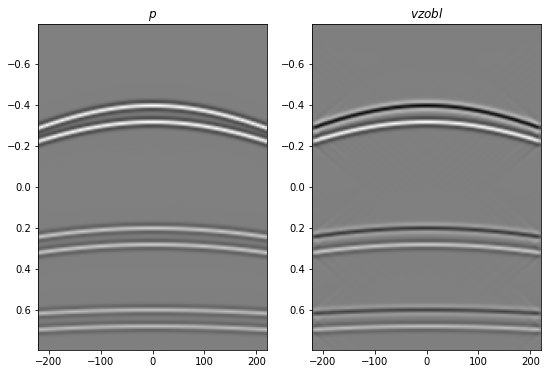

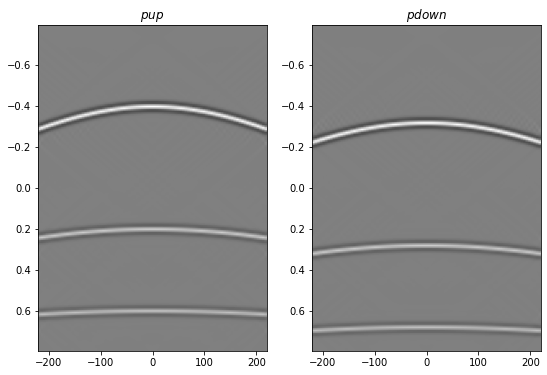

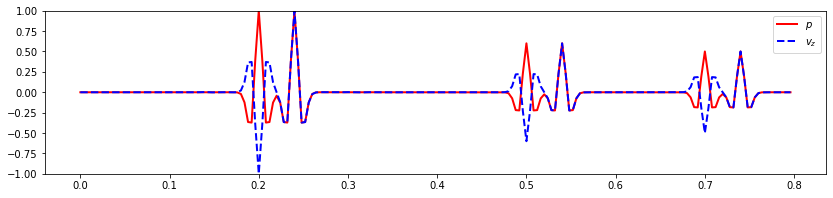

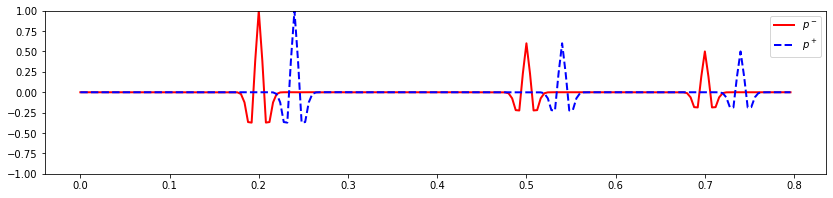

In [18]:
# NUMPY
pup_inv, pdown_inv = WavefieldDecomposition(cp.asnumpy(p), cp.asnumpy(vz), par['nt'], par['nx'], par['dt'], par['dx'], 
                                            rho_sep, vel_sep, nffts=(nfft, nfft), kind='inverse',
                                            critical=critical*100, ntaper=ntaper,
                                            dtype='complex128', **dict(iter_lim=10, atol=0, btol=0, show=True))

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(p).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[0].set_title(r'$p$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(vz_obl).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[1].set_title(r'$vzobl$')
#axs[1].plot(r[0], direct, 'r', lw=1)
axs[1].axis('tight')

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(pup_inv.T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[0].set_title(r'$pup$')
axs[0].axis('tight')
axs[1].imshow(pdown_inv.T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[1].set_title(r'$pdown$')
axs[1].axis('tight')

plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(p)[par['nx']//2], 'r', lw=2, label=r'$p$')
plt.plot(t, cp.asnumpy(vz_obl)[par['nx']//2], '--b', lw=2, label=r'$v_z$')
plt.ylim(-1, 1)
plt.legend()

plt.figure(figsize=(14, 3))
plt.plot(t, pup_inv[par['nx']//2], 'r', lw=2, label=r'$p^-$')
plt.plot(t, pdown_inv[par['nx']//2], '--b', lw=2, label=r'$p^+$')
plt.ylim(-1, 1)
plt.legend();

/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:106: RuntimeWarning: divide by zero encountered in true_divide
  OBL = Kz / (rho * np.abs(F))
/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:106: RuntimeWarning: invalid value encountered in true_divide
  OBL = Kz / (rho * np.abs(F))


<class 'cupy.core.core.ndarray'>
CGLS
-----------------------------------------------------------
The Operator Op has 35600 rows and 35600 cols
damp = 0.000000e+00	tol = 0.000000e+00	niter = 10
-----------------------------------------------------------------
    Itn           x[0]              r2norm
     1     -6.1e-18+2.9e-18j      1.2274e-21
     2     -4.4e-11+3.0e-11j      4.7175e-15
     3     -4.5e-06+1.8e-06j      4.0304e-24
     4     -4.5e-06+1.8e-06j      5.0011e-18
     5     -2.6e-06+-2.2e-06j      2.4708e-25
     6     -2.6e-06+-2.2e-06j      8.8895e-19
     7     4.6e-06+-1.6e-06j      5.0565e-26
     8     4.6e-06+-1.6e-06j      4.3475e-19
     9     -2.7e-06+1.1e-06j      1.5798e-26
    10     -2.7e-06+1.1e-06j      1.6588e-19

Iterations = 10        Total time (s) = 0.87
-----------------------------------------------------------------



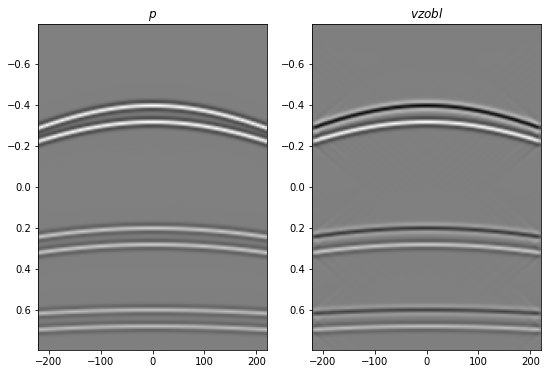

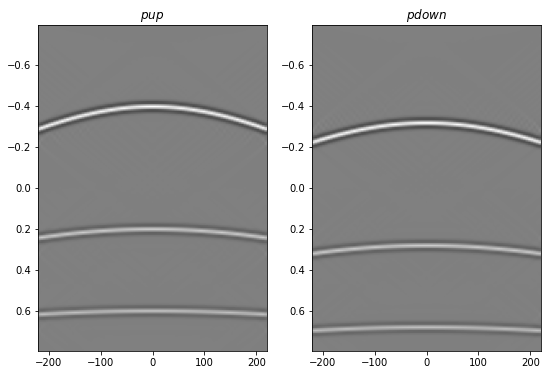

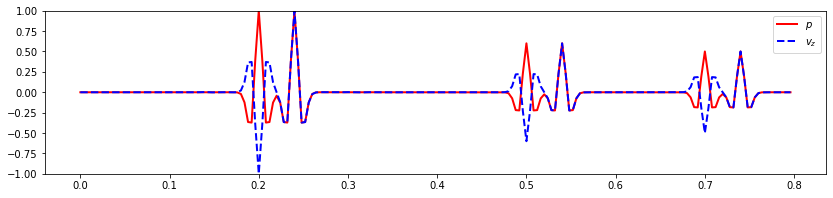

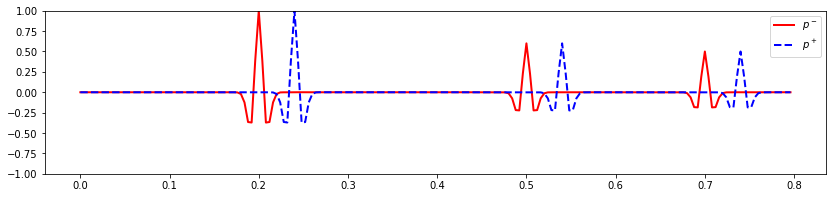

In [19]:
# CUPY
pup_inv, pdown_inv = WavefieldDecomposition(p, vz, par['nt'], par['nx'], par['dt'], par['dx'], 
                                            rho_sep, vel_sep, nffts=(nfft, nfft), kind='inverse',
                                            critical=critical*100, ntaper=ntaper, solver=cgls,
                                            dtype='complex128', 
                                            **dict(x0=cp.zeros(2*p.size, dtype='complex128'), 
                                                   niter=10, tol=0, show=True))

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(p).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[0].set_title(r'$p$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(vz_obl).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[1].set_title(r'$vzobl$')
#axs[1].plot(r[0], direct, 'r', lw=1)
axs[1].axis('tight')

fig, axs = plt.subplots(1, 2, figsize=(9,6))
axs[0].imshow(cp.asnumpy(pup_inv).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[0].set_title(r'$pup$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(pdown_inv).T, cmap='gray', vmin=-np.abs(p).max(), vmax=np.abs(p).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[1].set_title(r'$pdown$')
axs[1].axis('tight')

plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(p)[par['nx']//2], 'r', lw=2, label=r'$p$')
plt.plot(t, cp.asnumpy(vz_obl)[par['nx']//2], '--b', lw=2, label=r'$v_z$')
plt.ylim(-1, 1)
plt.legend()

plt.figure(figsize=(14, 3))
plt.plot(t, cp.asnumpy(pup_inv)[par['nx']//2], 'r', lw=2, label=r'$p^-$')
plt.plot(t, cp.asnumpy(pdown_inv)[par['nx']//2], '--b', lw=2, label=r'$p^+$')
plt.ylim(-1, 1)
plt.legend();

# Recomposition

/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:106: RuntimeWarning: divide by zero encountered in true_divide
  OBL = Kz / (rho * np.abs(F))
/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:106: RuntimeWarning: invalid value encountered in true_divide
  OBL = Kz / (rho * np.abs(F))


(-220.0, 220.0, 0.796, 0.0)

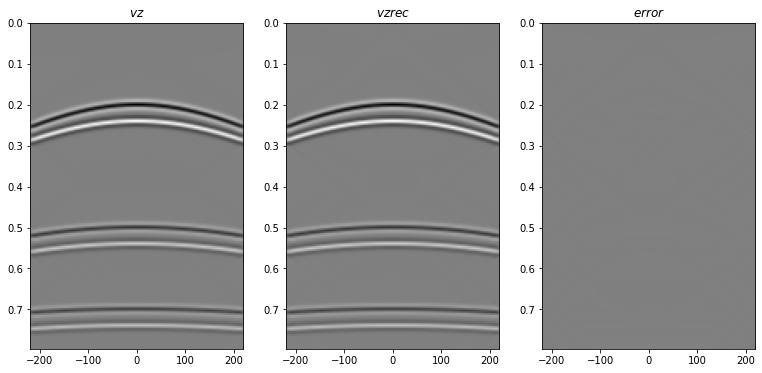

In [30]:
# NUMPY
PtoVop = PressureToVelocity(par['nt'], par['nx'], par['dt'], par['dx'], 
                            rho_sep, vel_sep, nffts=(nfft, nfft), 
                            critical=critical*100., ntaper=ntaper, topressure=False)

vdown_rec =  (PtoVop * cp.asnumpy(pdown_inv).ravel()).reshape(par['nx'], par['nt'])
vup_rec = (PtoVop * cp.asnumpy(pup_inv).ravel()).reshape(par['nx'], par['nt'])
vz_rec = np.real(vdown_rec - vup_rec)

fig, axs = plt.subplots(1, 3, figsize=(13, 6))
axs[0].imshow(cp.asnumpy(vz).T, cmap='gray', vmin=-np.abs(vz).max(), vmax=np.abs(vz).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[0].set_title(r'$vz$')
axs[0].axis('tight')
axs[1].imshow(vz_rec.T, cmap='gray', vmin=-np.abs(vz).max(), vmax=np.abs(vz).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[1].set_title(r'$vz rec$')
axs[1].axis('tight')
axs[2].imshow(cp.asnumpy(vz).T - vz_rec.T, cmap='gray', vmin=-np.abs(vz).max(), vmax=np.abs(vz).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[2].set_title(r'$error$')
axs[2].axis('tight')

/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:106: RuntimeWarning: divide by zero encountered in true_divide
  OBL = Kz / (rho * np.abs(F))
/usr/local/lib/python3.6/site-packages/pylops/waveeqprocessing/wavedecomposition.py:106: RuntimeWarning: invalid value encountered in true_divide
  OBL = Kz / (rho * np.abs(F))


(-220.0, 220.0, 0.796, 0.0)

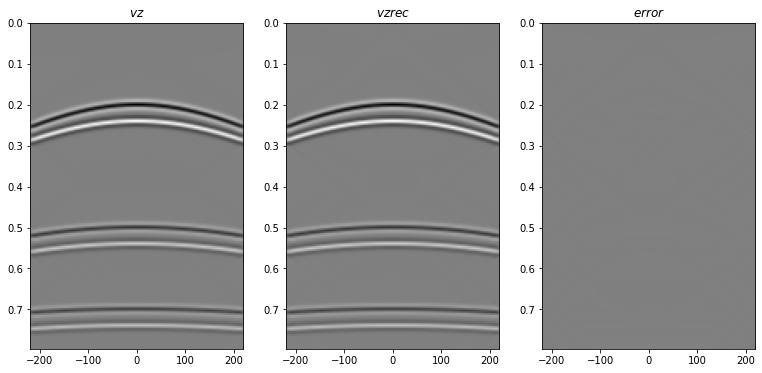

In [38]:
# CUPY
PtoVop = PressureToVelocity(par['nt'], par['nx'], par['dt'], par['dx'], 
                            rho_sep, vel_sep, nffts=(nfft, nfft), 
                            critical=critical*100., ntaper=ntaper, 
                            topressure=False, backend='cupy')

vdown_rec =  (PtoVop * pdown_inv.ravel()).reshape(par['nx'], par['nt'])
vup_rec = (PtoVop * pup_inv.ravel()).reshape(par['nx'], par['nt'])
vz_rec = np.real(vdown_rec - vup_rec)

fig, axs = plt.subplots(1, 3, figsize=(13, 6))
axs[0].imshow(cp.asnumpy(vz).T, cmap='gray', vmin=-np.abs(vz).max(), vmax=np.abs(vz).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[0].set_title(r'$vz$')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(vz_rec).T, cmap='gray', vmin=-np.abs(vz).max(), vmax=np.abs(vz).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[1].set_title(r'$vz rec$')
axs[1].axis('tight')
axs[2].imshow(cp.asnumpy(vz).T - cp.asnumpy(vz_rec).T, cmap='gray', vmin=-np.abs(vz).max(), vmax=np.abs(vz).max(),
              extent = (x.min(),x.max(),t.max(),t.min()))
axs[2].set_title(r'$error$')
axs[2].axis('tight')